 # Importing Libraries

In [3]:
!pip install --upgrade tensorflow --quiet
!pip install matplotlib --quiet

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Importing Images 

In [6]:
SIZE = 256
BATCH_SIZE = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Datasets",
    shuffle=True,
    image_size = (SIZE,SIZE),
    batch_size = BATCH_SIZE
)

len(dataset)

Found 2152 files belonging to 3 classes.


68

In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

2024-07-24 17:53:32.007063: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


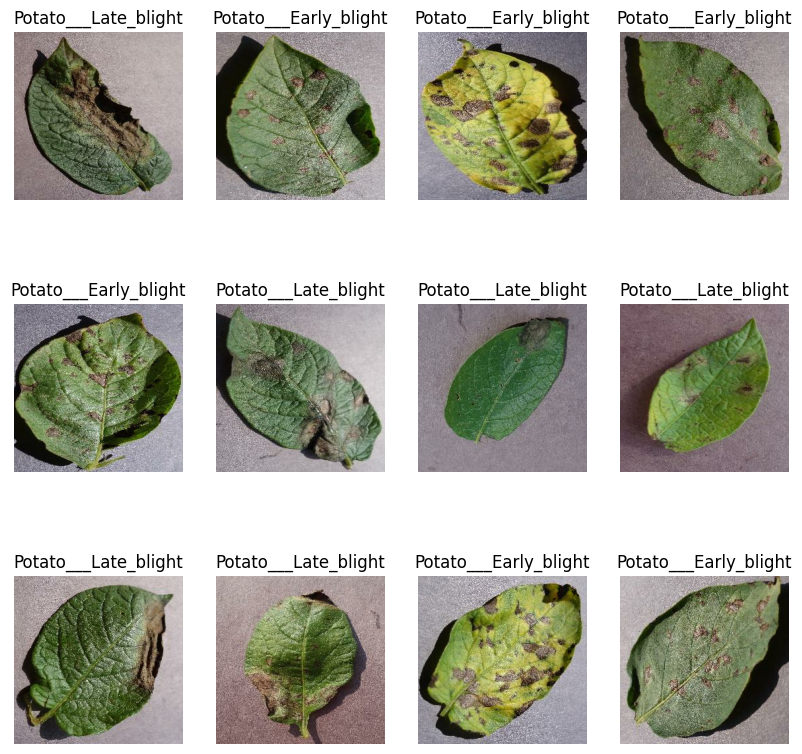

In [8]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
  for i in range(12):
      plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

# Splitting data into Training, Validation and Test Sets:
80% ==> training
20% ==> 10% validation, 10% test

In [9]:
dataset = dataset.shuffle(10000,seed=13)

# Training Dataset
train_size = 0.8
s = int(len(dataset) * train_size)
train = dataset.take(s)
print(len(train))

test = dataset.skip(s)

# Validation Dataset
val_size = 0.1
s1 = int(len(dataset) * val_size)
valid = test.take(s1)
print(len(valid))

# Test Dataset
test = test.skip(s1)
print(len(test))

54
6
8


In [10]:
train = train.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
valid = valid.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

# Model Building

In [13]:
# class myCallBack(tf.keras.callbacks.Callback):
#     def on_epoch_end(self,epoch,logs={}):
#         if(logs.get('accuracy') > 0.95):
#             print("\n Reached 95% Accuracy")
#             self.model.stop.training=True

# callbacks = myCallBack()

In [11]:
import tensorflow as tf
from tensorflow.keras import layers

SIZE = 256 
BATCH_SIZE = 32

# Pre-Processing and Data Augmentation
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(SIZE, SIZE),
    tf.keras.layers.Rescaling(1./255)
])

augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

# Build the model
model = tf.keras.models.Sequential([
    layers.Input(shape=(SIZE, SIZE, 3)),
    resize_and_rescale,
    augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train, epochs=50, batch_size=BATCH_SIZE, verbose=1, validation_data=valid)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 468ms/step - accuracy: 0.4789 - loss: 0.8860 - val_accuracy: 0.7396 - val_loss: 0.5996
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 446ms/step - accuracy: 0.8184 - loss: 0.4516 - val_accuracy: 0.8177 - val_loss: 0.4441
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 441ms/step - accuracy: 0.8343 - loss: 0.3923 - val_accuracy: 0.8698 - val_loss: 0.3465
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 441ms/step - accuracy: 0.8997 - loss: 0.2782 - val_accuracy: 0.8698 - val_loss: 0.2780
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 445ms/step - accuracy: 0.8977 - loss: 0.2544 - val_accuracy: 0.9271 - val_loss: 0.1938
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 450ms/step - accuracy: 0.9228 - loss: 0.2029 - val_accuracy: 0.9219 - val_loss: 0.2474
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 445ms/step - accuracy: 0.9348 - loss: 0.1732 - val_accuracy: 0.9167 - val_loss: 0.2349
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 449ms/step - accuracy: 0.9282 - loss: 0.1937 - val_accu

In [12]:
scores = model.evaluate(test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9889 - loss: 0.0303


In [13]:
scores

[0.03549152985215187, 0.9870689511299133]

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833,675 (3.18 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 555,784 (2.12 MB)

# Plotting Accuracy and Loss Curves

In [15]:
# history
# history.params
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

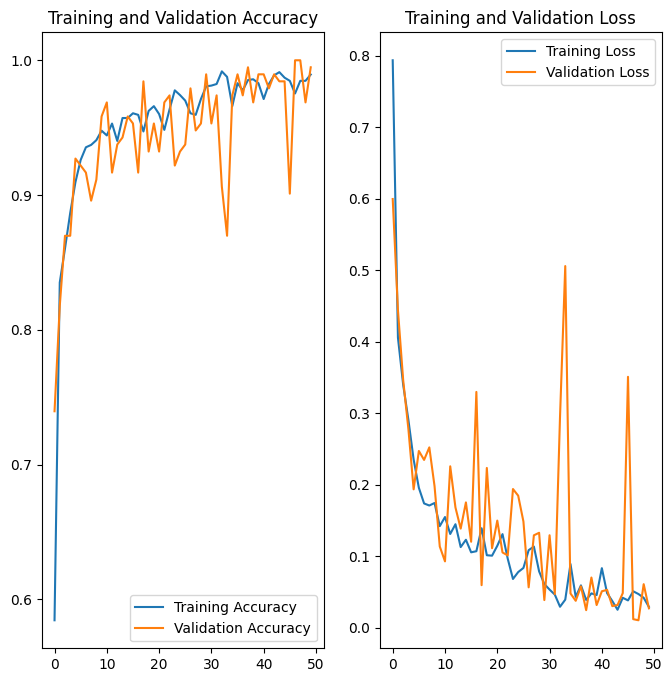

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction

First Image to predict
First Image's actual Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Potato___Late_blight


2024-07-24 18:14:51.875293: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


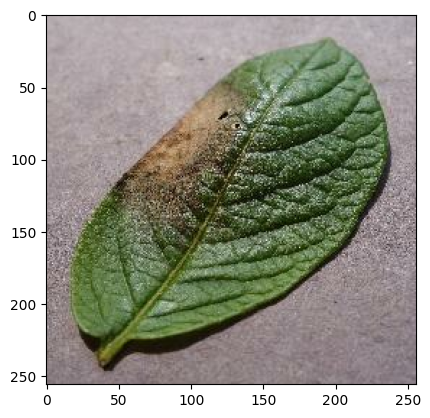

In [18]:
for image_batch , label_batch in dataset.take(1):
  # plt.imshow(image_batch[0].numpy().astype('uint8'))
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]
    
    print("First Image to predict")
    plt.imshow(first_image)
    print("First Image's actual Label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    fclass = class_names[np.argmax(batch_prediction[0])]
    print(fclass)

In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


2024-07-24 18:14:57.168121: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at strided_slice_op.cc:117 : INVALID_ARGUMENT: slice index 8 of dimension 0 out of bounds.


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

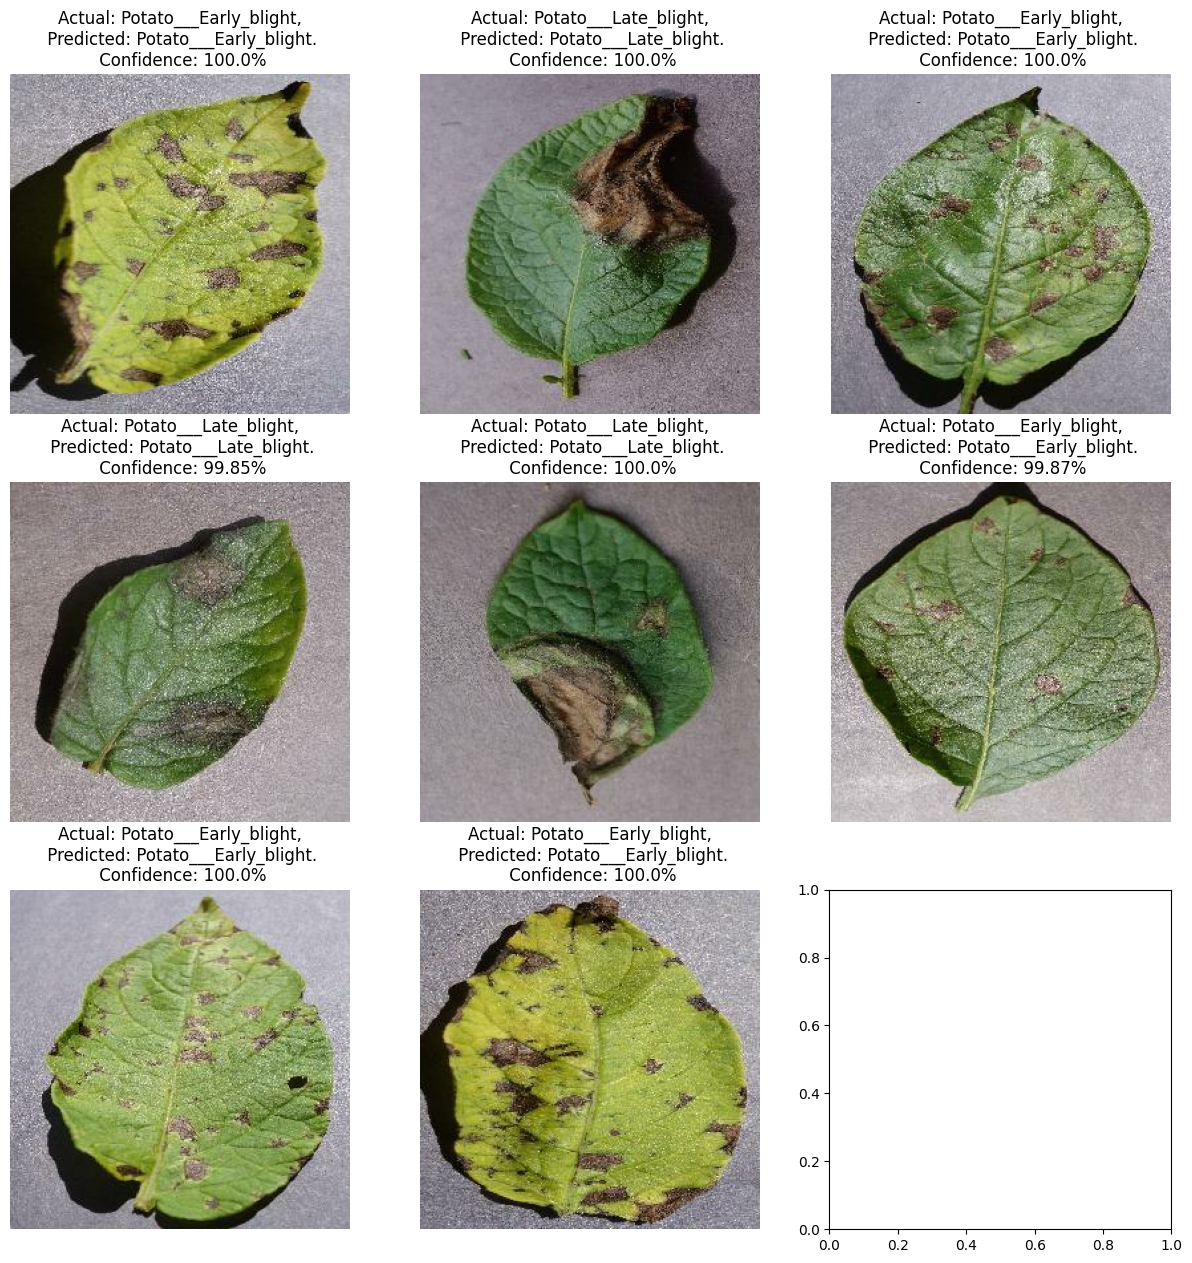

In [20]:
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# Saving the Model

In [39]:
import pickle
with open('model.pickle','wb') as f:
  pickle.dump(model,f)

In [19]:
model.save('my_model.keras')

In [21]:
model_json = model.to_json()
with open('my_model.json', 'w') as json_file:
    json_file.write(model_json)
 
 
# Output confirmation message
print("Model architecture saved successfully.")

Model architecture saved successfully.
